<center> <h1>Entrega computacional n°3</h1></center>

<center> <h2>Matias Cartelli</h2> </center>

<b>Libreta:</b> 280/17


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import display, Markdown, Latex

 ## Consignas del TP:

<b> I.</b> Resuelva  el  problema  8  de  la  guía  6  y  presente  un  breve  informe  con  los  resultados obtenidos en los ítems c, d y e. 

<b> II.</b> Acompañe el ítem d con la verificación numérica que se propone en el problema 9 de la misma guía.

## Problema 8

Considere $N$ mediciones $(y_i,x_i)$ donde los $y_i$ son independientes y todos con el mismo error $\sigma$, ésto es, $Cov(Y_i,Y_j)=\delta_{ij}\sigma^2$, donde $\delta_{ij}$ es la delta de Kronecker. En este caso los $x_i$ son números sin error (no son variables aleatorias). Los parámetros de la recta $y=a_1 +a_2 x$ que mejor ajusta a los datos surgen de minimizar la suma $S_N=\sum_i^N [y_i-(a_1+a_2 x_i)]^2$, obteniéndose la conocida fórmula de cuadrados mínimos

$$\hat{a}_1=\frac{(\Sigma x_i^2\Sigma y_i-\Sigma x_i \Sigma x_i y_i)}{\Delta}$$
$$\hat{a}_2=\frac{(N \Sigma x_i y_i-\Sigma x_i \Sigma y_i)}{\Delta}$$

con $\Delta=N \Sigma x_i^2-(\Sigma x_i)^2$.


<b>(a) </b> Usando la fórmula de propagación de errores muestre que la matriz de covarianza de los parámetros de
la recta es

$$Cov(\hat{a}_1,\hat{a}_2)=\frac{\sigma^2}{\Delta}\begin{pmatrix}\Sigma x_i^2 & -\Sigma x_i\\ -\Sigma x_i & N\end{pmatrix}$$

<b> (b) </b> Analice intuitivamente por qué la correlación es negativa si el promedio de los datos está del lado
positivo de la abscisa, positiva en el caso contrario, y por qué la pendiente y la ordenada al origen no
están correlacionadas si $\Sigma x_i=0$.
 

Ayuda: puede ser útil usar que la recta ajustada $y=\hat{a}_1+\hat{a}_2 x$, pasa por el punto $(\overline{x},\overline{y})$.

<b> (c) </b> Encuentre, con su error, los  parámetros de la recta que mejor ajusta los siguientes datos, con $\sigma=0.3$. Grafique los datos, con su error, y la recta obtenida para $0\leq x\leq 5$.

| X | 2.00 | 2.10 | 2.20 | 2.30 | 2.40 | 2.50 | 2.60 | 2.70 | 2.80 | 2.90 | 3.00 |
|:-:|------|------|------|------|------|------|------|------|------|------|------|
| Y | 2.78 | 3.29 | 3.29 | 3.33 | 3.23 | 3.69 | 3.46 | 3.87 | 3.62 | 3.40 | 3.99 |

<b> (d) </b> A partir de esta recta prediga, con su error, el valor esperado $y_a$ para un cierto $x_a$. No  olvide usar la matriz de covarianza completa. Grafique $y_a(x_a)$, y agréguelo al gráfico anterior en forma de banda de error. Encuentre qué valor de $x_a$ minimiza el error de $y_a$, e interprete la magnitud de este valor mínimo. Discuta por qué el error aumenta para valores de $x_a$ alejados de la región donde se hicieron las mediciones.

<b> (e) </b>  Grafique la banda de error que obtiene si ignora el término de correlación en la propagación de errores y discuta por qué ésta es claramente errónea.

### Resolución de los incisos <b>(c)</b>, <b>(d)</b> y <b>(e)</b> del problema 8

<h3> (c) </h3>

Usando el resultado del inciso <b>(a)</b> sabemos que el error de los parámetros son

$$\sigma_{\hat{a_1}} = \sqrt{Var(\hat{a_1})} = \frac{\sigma}{\sqrt{\Delta}} \sqrt{\Sigma x_i^2}$$
$$\sigma_{\hat{a_2}} = \sqrt{V(\hat{a_2})} = \frac{\sigma}{\sqrt{\Delta}} \sqrt{N}$$



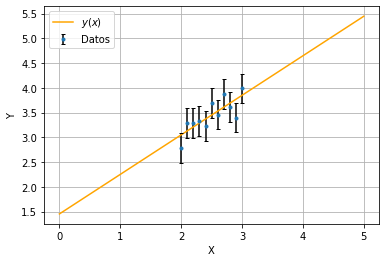

In [3]:
#Definimos los parámetros del problema
Sigma= 0.3
X = np.array([2.00,2.10,2.20,2.30,2.40,2.50,2.60,2.70,2.80,2.90,3.00])
Y = np.array([2.78,3.29,3.29,3.33,3.23,3.69,3.46,3.87,3.62,3.40,3.99])
N = len(X)

#Definimos los valores para Delta, a_1, a_2
Delta = N*np.sum(X*X)- (np.sum(X))**2
a1 = (np.sum(X*X) * np.sum(Y) - np.sum(X)* np.sum(X*Y))/Delta
a2 = (np.sum(X*Y)*N- np.sum(Y)*np.sum(X))/Delta

#Errores de los a1, a2
erra1 = np.sqrt((np.sum(X*X))*(Sigma**2/Delta))
erra2 = np.sqrt(N*(Sigma**2/Delta))

#Definimos la recta con su dominio
x = np.linspace(0,5,100)
y=a1+a2*x

#Ploteo
plt.plot(x,y,color="orange", label="$y(x)$")
plt.errorbar(X,Y,yerr=Sigma,fmt=".",color="C0",ecolor="black",capsize=2,label="Datos")
plt.ylabel("Y")
plt.xlabel("X")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
display(Markdown("Obtenemos así los valores para $\hat{a_1}$,$\hat{a_2}$: <br> $\hat{a_1}=$ "+str(np.around(a1,3))+"$\pm$"+str(np.around(erra1,3))+"<br>$\hat{a_2}= $ "+str(np.around(a2,3))+"$\pm$"+str(np.around(erra2,3))))

Obtenemos así los valores para $\hat{a_1}$,$\hat{a_2}$: <br> $\hat{a_1}=$ 1.452$\pm$0.721<br>$\hat{a_2}= $ 0.799$\pm$0.286

Vemos que la recta con estos parámetros ajusta correctamente a los datos.

<h3> (d) </h3>

Vemos cual es el error $Var (y_a)$ sabiendo que $y_a = \hat{a_1} + x_a \hat{a_2}$, entonces

$$ Var(y_a) = \left(\frac{\partial y_a}{\partial \hat{a_1}}\right)^2 Var(\hat{a_1}) + \left(\frac{\partial y_a}{\partial \hat{a_2}}\right)^2 Var(\hat{a_2}) + 2 \frac{\partial y_a}{\partial \hat{a_1}}\frac{\partial y_a}{\partial \hat{a_2}} Cov(\hat{a_1},\hat{a_2}),$$

sabemos que 

$$\begin{cases}
    \frac{\partial y_a}{\partial \hat{a_1}} = 1\\
    \frac{\partial y_a}{\partial \hat{a_1}}=x_a\\  
    Var(\hat{a_1}) = \frac{\sigma^2}{\Delta}\Sigma x_i^2\\ 
    Cov(\hat{a_1},\hat{a_2}) = - \frac{\sigma^2}{\Delta} \Sigma x_i\\ 
    Var(\hat{a_2}) = \frac{\sigma^2}{\Delta} N
    \end{cases}$$
    
entonces tenemos

$$\boxed{Var(y_a) =  \frac{\sigma^2}{\Delta}\left(\Sigma x_i^2 +   x_a^2 N -  2 x_a \Sigma x_i\right)}$$


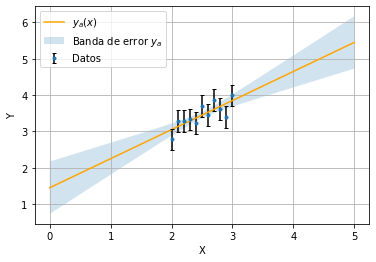

In [5]:
#Definimos la varianza de y
var_y = (Sigma**2/Delta)*(np.sum(X*X)+x**2 * N - 2*x* np.sum(X))

#Ploteo
plt.plot(x,y,color="orange", label="$y_a(x)$")
plt.fill_between(x,y- np.sqrt(var_y),y+np.sqrt(var_y),alpha=0.2, label="Banda de error $y_a$")
plt.errorbar(X,Y,yerr=Sigma,fmt=".",color="C0",ecolor="black",capsize=2,label="Datos")
plt.ylabel("Y")
plt.xlabel("X")
plt.legend()
plt.grid(True)
plt.show()

Notamos ahora que el error se achica en el centro (donde se encuentran los datos) y crece a medida que nos alejamos de estos. Esto nos dice que conocemos mejor la recta en la zona donde tenemos la información (los datos).

In [6]:
ya = a1+a2*0.5
errya = np.sqrt((Sigma**2/Delta)*(np.sum(X*X)+0.5**2 * N - 2*0.5* np.sum(X)))
display(Markdown("Ahora evaluando en $x_a = 0.5$ obtenemos valor esperado de $y_a$, tal que <br>$y_a =$ "+ str(round(ya,3))+" $\pm$ "+str(round(errya,3))))

Ahora evaluando en $x_a = 0.5$ obtenemos valor esperado de $y_a$, tal que <br>$y_a =$ 1.852 $\pm$ 0.579

Ahora si queremos hallar el $x_a$ que minimiza el error, derivamos e igualamos a cero, de forma que

$$\frac{\partial}{\partial x_a} (Var(y_a)) = 0$$

$$\frac{\sigma^2}{\Delta}(2x_{am} N- 2\Sigma x_i) = 0$$

$$\boxed{x_{am} = \frac{\Sigma x_i}{N}}$$

Notamos que el valor de $x_a$ que minimiza corresponde con el promedio de $x$. Esto tiene sentido ya que en el anterior gráfico observamos que en la región del centro el error es menor. Con esto podemos decir que los datos siguen una distribución lineal y que el mínimo error se encuentra en el centro del set de datos.

<h3> (e)</h3>


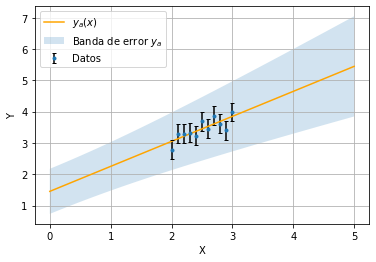

In [6]:
#Definimos la varianza de y sin el término de covarianza
var_y = (Sigma**2/Delta)*(np.sum(X*X)+x**2 * N)

#Ploteo
plt.plot(x,y,color="orange", label="$y_a(x)$")
plt.fill_between(x,y- np.sqrt(var_y),y+np.sqrt(var_y),alpha=0.2, label="Banda de error $y_a$")
plt.errorbar(X,Y,yerr=Sigma,fmt=".",color="C0",ecolor="black",capsize=2,label="Datos")
plt.ylabel("Y")
plt.xlabel("X")
plt.legend()
plt.grid(True)
plt.show()

En este caso no consideramos que los parámetros no son independientes.
Vemos que la banda de error no se achica en el centro como en el inciso <b>(d)</b>, ahora crece a medida que avanzamos en X. Esto no tiene sentido, ya que los datos parecen no influir en nada en el error. Cerca de los datos deberíamos conocer mejor como es la recta.   

## Problema 9
Verifique los resultados analíticos obtenidos en el ítem <b>8d</b> escribiendo un programa que realice la siguiente simulación numérica:

<b> I.</b> para cada $x_i$ genere al azar un $y_i$ de la distribución gaussiana $N(\hat{a_1}+\hat{a_2}x_i,\sigma)$.

<b> II.</b> ajuste una recta a los $(x_i,y_i)$ generados, y prediga el valor $y_a$ para $x_a= 0.5$.

Repita 1000 veces los pasos <b>I, II</b>, construyendo un histograma con los valores de $y_a$, y dibuje sobre éste la gaussiana con el valor esperado y el error de $y_a$ calculado teóricamente en <b>8d</b>.

Definimos la función que realizará los pasos <b>I,II</b>:

In [7]:
'''

Definimos la función f que toma como input al valor de x_a y n cantidad de valores y_a que queremos. Esta realiza los pasos
I y II n cantidad de veces y guarda los valores de y_a evaluadas en x_a en un array.

'''
def f(x,n):
    
    #Defino los parámetros que se mantienen constantes en los pasos I y II
    Sigma= 0.3
    X = np.array([2.00,2.10,2.20,2.30,2.40,2.50,2.60,2.70,2.80,2.90,3.00])
    N = len(X)
    Delta = N*np.sum(X*X)- (np.sum(X))**2
    
    #Defino lo que será el array que contenga los n valores para y_a evaluados en x.
    y_9 = np.zeros(n)
    
    '''
    Lo siguiente realiza los pasos I y II. Me genero n set de datos Y, de la misma longitud que X, que sigan la distribución 
    gaussiana correspondiente y para cada set de datos busco el valor de la recta que los ajusta evaluada en x.
    Estos valores son guardados en un array, el cual es el que devuelve la función.
    '''
    for i in range(n):
        
        #Creo un array de la longitud de X con valores que siguen distribución gaussiana.
        Y_9 = np.array(np.random.normal(a1+a2*X,Sigma)) 
        
        #Defino los nuevos a1 y a2, con respecto a mi nuevo set de datos.
        a19 = (np.sum(X*X) * np.sum(Y_9) - np.sum(X)* np.sum(X*Y_9))/Delta
        a29 = (np.sum(X*Y_9)*N- np.sum(Y_9)*np.sum(X))/Delta
        
        #Defino la recta para cada set de datos
        y_9[i] = a19+a29*x
    
    return y_9

Ahora hacemos el histograma, con su gráfico y la gaussiana teórica.

Para las barras de error sigo lo explicado en la primera entrega computacional, sabemos que las alturas de cada bin siguen una distribución de Poisson, luego el error será la raíz de la altura correspondiente (que tomamos como esperanza) dividida por la cantidad de datos para normalizar y el ancho de los bins (ya que no son de ancho 1). En este caso la altura de los bins la calculamos ya normalizada entonces solo hay que dividir por la raíz de la cantidad de datos tal que

$$\sigma = \frac{\sqrt{Y}}{N \ a}= \sqrt{\frac{Y_n}{N \ a}},$$

donde $Y$ es la altura de los bins, $a$ el ancho del bin, $N$ la cantidad de datos, $Y_n= \frac{Y}{N \ a}$ la altura normalizada.

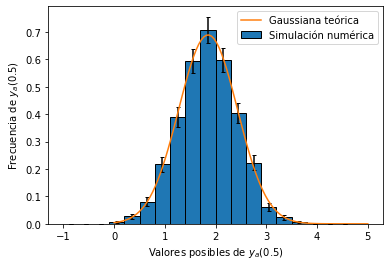

In [11]:

#Llamamos y_a al array con los valores para y_a evaluados en x_a=0.5
y_a = f(.5,1000)

#Realizamos el histograma
bins= np.arange(-1,5,.3)#Defino la cantidad de bins.
Y0=plt.hist(y_a,bins=bins,density=True,ec="k",label= "Simulación numérica")[0]#Defino las alturas de los bins. 

#Ploteo los errores del histograma
'''

Acá pongo como input, los bins pero resto 1 a la cantidad de bins y le sumo la mitad del ancho de estos para
centrar las barras de error, luego toma las alturas que en este caso las definí como Y0 y el error como se explicó anteriormente.  

'''
plt.errorbar(np.delete(bins,-1)+ np.diff(bins)/2,Y0,fmt='none',yerr=np.sqrt(Y0/(len(y_a)*np.diff(bins))), capsize=2,color= "black")


#Ploteo la gaussiana teórica
plt.plot(x,stats.norm.pdf(x,ya,errya),label= "Gaussiana teórica")


plt.ylabel("Frecuencia de $y_a(0.5)$")
plt.xlabel("Valores posibles de $y_a(0.5)$")
plt.legend()
plt.show()

Notamos que la gaussiana obtenida con el valor esperado y el error de $y_a$ obtenidos en el <b>8d</b> coincide correctamente con la simulación numérica.